In [ ]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
X,Y = tf.keras.datasets.boston_housing.load_data(path='boston_housing.npz', test_split=0.2,seed=113)

In [ ]:
x_train = X[0]
y_train = X[1]
x_test = Y[0]
y_test = Y[1]
x_train.shape,y_train.shape,x_test.shape,y_test.shape

((404, 13), (404,), (102, 13), (102,))

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)


# Model 1 - Using Three Four layers

In [ ]:
from tensorflow.keras.layers import Dense

model1 = tf.keras.models.Sequential([
    Dense(64, activation='relu', input_shape=(x_train.shape[1],)),
    Dense(32, activation='softmax'),
    Dense(8),
    Dense(1),
])


In [ ]:
model1.compile(optimizer='adam', loss='mse', metrics=['mae'])


In [ ]:
history = model1.fit(x_train, y_train, epochs=100, batch_size=32, validation_split=0.1,verbose=1)


Epoch 1/100
12/12 [==============================] - 1s 18ms/step - loss: 589.7935 - mae: 22.3718 - val_loss: 497.3714 - val_mae: 21.3219
Epoch 2/100
12/12 [==============================] - 0s 6ms/step - loss: 584.0008 - mae: 22.2419 - val_loss: 491.7753 - val_mae: 21.1894
Epoch 3/100
12/12 [==============================] - 0s 6ms/step - loss: 577.8024 - mae: 22.1030 - val_loss: 485.5399 - val_mae: 21.0414
Epoch 4/100
12/12 [==============================] - 0s 6ms/step - loss: 570.8162 - mae: 21.9458 - val_loss: 478.3929 - val_mae: 20.8716
Epoch 5/100
12/12 [==============================] - 0s 6ms/step - loss: 562.9811 - mae: 21.7698 - val_loss: 470.6887 - val_mae: 20.6877
Epoch 6/100
12/12 [==============================] - 0s 7ms/step - loss: 554.6699 - mae: 21.5817 - val_loss: 462.5160 - val_mae: 20.4927
Epoch 7/100
12/12 [==============================] - 0s 6ms/step - loss: 545.9976 - mae: 21.3842 - val_loss: 454.1351 - val_mae: 20.2916
Epoch 8/100
12/12 [=====================

In [ ]:
loss1, mae1 = model1.evaluate(x_test, y_test)


4/4 [==============================] - 0s 4ms/step - loss: 41.9525 - mae: 4.2334


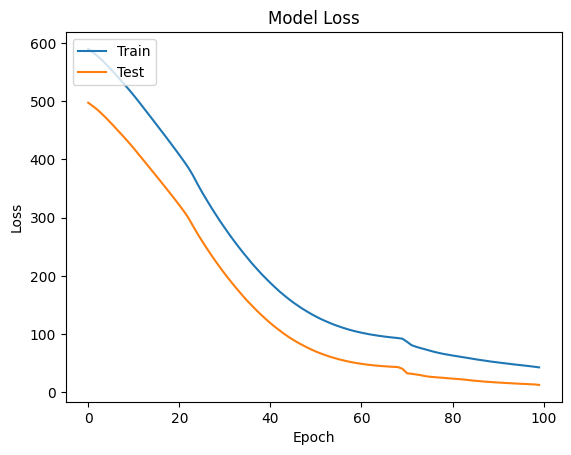

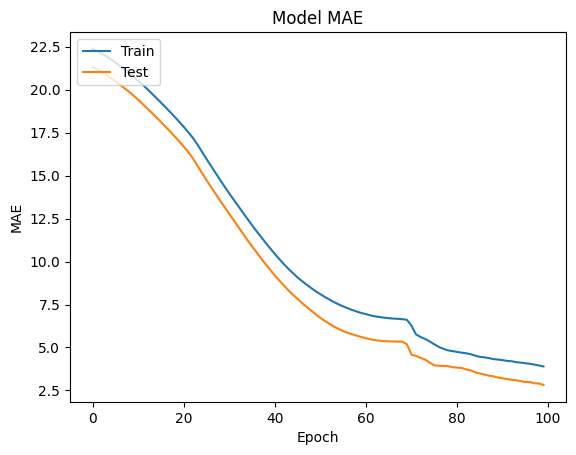

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

plt.plot(history.history['mae'])
plt.plot(history.history['val_mae'])
plt.title('Model MAE')
plt.ylabel('MAE')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Model X - Using Pytorch Neural Networks using 3 layers (ignore)

In [ ]:
import torch.nn as nn
import torch.optim as optim

In [ ]:
#Defining Class

class regression_nn(nn.Module):
  # def __init__(self):
  #   super().__init__()
  #   self.h1 = nn.Linear(64,32)
  #   self.act1 = nn.ReLU()
  #   self.h2 = nn.Linear(32,16)
  #   self.act2 = nn.ReLU()
  #   self.out = nn.Linear(16,1)
  #   self.out_lay = nn.ReLU()

  # def forward(self,reg1):
  #   reg1 = self.h1(self.act1)
  #   reg1 = self.h2(self.act2)
  #   reg1 = self.out()
  #   return reg1
    def __init__(self):
        super().__init__()
        self.hidden1 = nn.Linear(10, 12)
        self.act1 = nn.ReLU()
        self.hidden2 = nn.Linear(12, 8)
        self.act2 = nn.ReLU()
        self.output = nn.Linear(8, 1)
        self.act_output = nn.Sigmoid()
        # self.double()

    def forward(self, x):
        x = self.act1(self.hidden1(x))
        x = self.act2(self.hidden2(x))
        x = self.act_output(self.output(x))
        return x

In [ ]:
#convert data to tensor
import torch

xt_train = torch.tensor(x_train,dtype = torch.float32)
yt_train = torch.tensor(y_train,dtype = torch.float32).reshape(-1,1)
xt_test = torch.tensor(x_test,dtype = torch.float32)
yt_test = torch.tensor(y_test,dtype = torch.float32).reshape(-1,1)

In [ ]:
reg = regression_nn()

loss_fxn = nn.BCELoss()
opt = optim.Adam(reg.parameters(),lr=0.002)

In [ ]:
n_epochs = 100
batch_size = 10

for epoch in range(n_epochs):
    for i in range(0, len(X), batch_size):
        # Xbatch = torch.tensor(xt_train[i:i+batch_size,:-1])
        Xbatch = torch.tensor(xt_train[i:i+batch_size,:-1], dtype=torch.float32)
        y_pred = reg(Xbatch)
        ybatch = yt_train[i:i+batch_size]
        loss = loss_fxn(y_pred, ybatch)
        opt.zero_grad()
        loss.backward()
        opt.step()
    print(f'Finished epoch {epoch}, latest loss {loss}')

<ipython-input-109-e486871c3eb3>:7: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  Xbatch = torch.tensor(xt_train[i:i+batch_size,:-1], dtype=torch.float32)


RuntimeError: mat1 and mat2 shapes cannot be multiplied (10x12 and 10x12)

# Model 2 - Using Three layers

In [ ]:
from tensorflow.keras.layers import Dense

model2 = tf.keras.models.Sequential([
    Dense(32, activation='softmax'),
    Dense(8),
    Dense(1),
])

In [ ]:
model2.compile(optimizer='adam', loss='mse', metrics=['mae'])

In [ ]:
history2 = model2.fit(x_train, y_train, epochs=100, batch_size=32, validation_split=0.1,verbose=1)

Epoch 1/100
12/12 [==============================] - 1s 17ms/step - loss: 596.4600 - mae: 22.5160 - val_loss: 504.5770 - val_mae: 21.4885
Epoch 2/100
12/12 [==============================] - 0s 6ms/step - loss: 592.2072 - mae: 22.4237 - val_loss: 500.5092 - val_mae: 21.3949
Epoch 3/100
12/12 [==============================] - 0s 5ms/step - loss: 587.7459 - mae: 22.3273 - val_loss: 496.2256 - val_mae: 21.2958
Epoch 4/100
12/12 [==============================] - 0s 5ms/step - loss: 583.0812 - mae: 22.2239 - val_loss: 491.5320 - val_mae: 21.1874
Epoch 5/100
12/12 [==============================] - 0s 5ms/step - loss: 577.9026 - mae: 22.1112 - val_loss: 486.4814 - val_mae: 21.0699
Epoch 6/100
12/12 [==============================] - 0s 5ms/step - loss: 572.3909 - mae: 21.9877 - val_loss: 480.9326 - val_mae: 20.9402
Epoch 7/100
12/12 [==============================] - 0s 5ms/step - loss: 566.3478 - mae: 21.8531 - val_loss: 474.9515 - val_mae: 20.7995
Epoch 8/100
12/12 [=====================

In [ ]:
loss2, mae2 = model2.evaluate(x_test, y_test)

4/4 [==============================] - 0s 3ms/step - loss: 41.0796 - mae: 4.3761


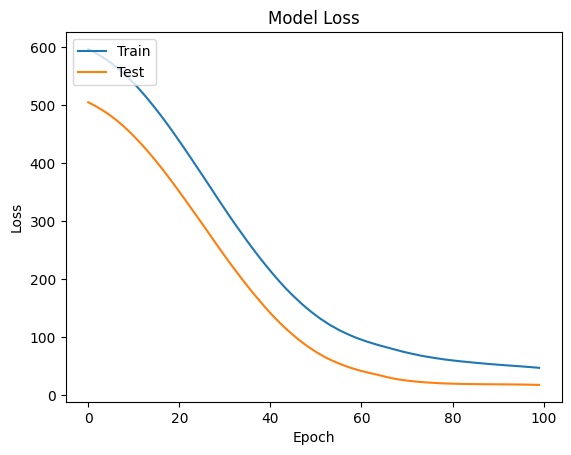

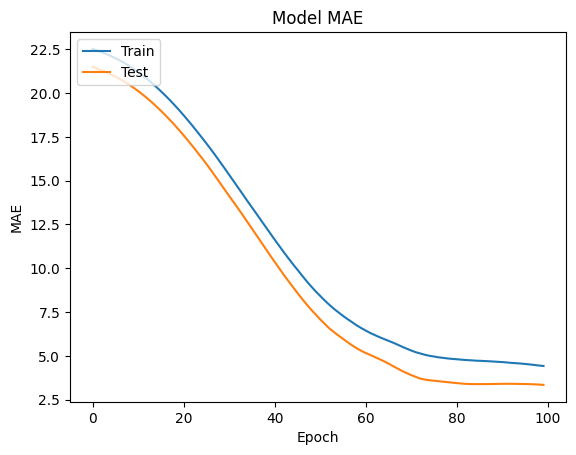

In [ ]:
plt.plot(history2.history['loss'])
plt.plot(history2.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

plt.plot(history2.history['mae'])
plt.plot(history2.history['val_mae'])
plt.title('Model MAE')
plt.ylabel('MAE')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Model 3 - Using Three layers with Flattern layers

In [ ]:
# neural network of three layers using tensorflow with flattern layers

model3 = tf.keras.models.Sequential([
    Dense(64, activation='relu', input_shape=(x_train.shape[1],)),
    tf.keras.layers.Flatten(),
    Dense(32, activation='softmax'),
    Dense(8),
    Dense(1),
])


In [ ]:
model3.compile(optimizer='adam', loss='mse', metrics=['mae'])

history3 = model3.fit(x_train, y_train, epochs=100, batch_size=32, validation_split=0.1,verbose=1)

Epoch 1/100
12/12 [==============================] - 1s 19ms/step - loss: 42.1832 - mae: 3.7323 - val_loss: 12.7766 - val_mae: 2.9053
Epoch 2/100
12/12 [==============================] - 0s 7ms/step - loss: 40.5444 - mae: 3.6783 - val_loss: 12.1441 - val_mae: 2.8014
Epoch 3/100
12/12 [==============================] - 0s 6ms/step - loss: 38.8640 - mae: 3.6211 - val_loss: 11.7874 - val_mae: 2.8150
Epoch 4/100
12/12 [==============================] - 0s 8ms/step - loss: 37.4032 - mae: 3.5472 - val_loss: 11.1694 - val_mae: 2.7316
Epoch 5/100
12/12 [==============================] - 0s 6ms/step - loss: 35.7094 - mae: 3.4721 - val_loss: 10.7989 - val_mae: 2.6944
Epoch 6/100
12/12 [==============================] - 0s 7ms/step - loss: 34.3777 - mae: 3.4200 - val_loss: 10.3230 - val_mae: 2.6306
Epoch 7/100
12/12 [==============================] - 0s 7ms/step - loss: 33.1267 - mae: 3.3591 - val_loss: 9.8916 - val_mae: 2.5642
Epoch 8/100
12/12 [==============================] - 0s 7ms/step - lo

In [ ]:
loss3, mae3 = model3.evaluate(x_test, y_test)

4/4 [==============================] - 0s 4ms/step - loss: 18.0533 - mae: 2.5710


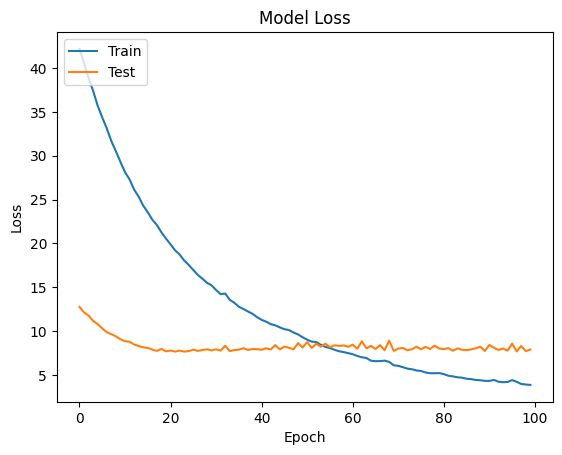

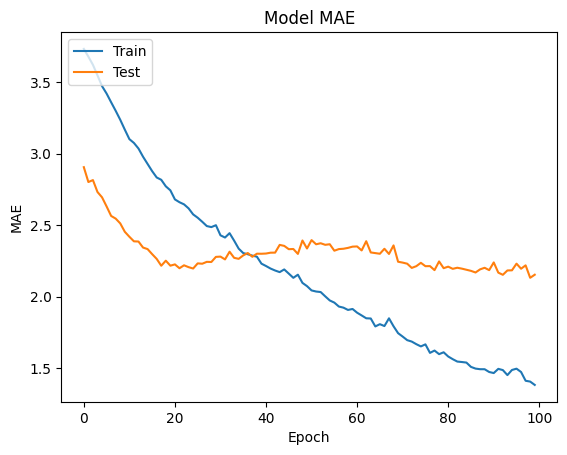

In [ ]:
plt.plot(history3.history['loss'])
plt.plot(history3.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

plt.plot(history3.history['mae'])
plt.plot(history3.history['val_mae'])
plt.title('Model MAE')
plt.ylabel('MAE')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()